## 3.3.4 Challenge: Advanced Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from scipy.stats import ttest_ind
import statsmodels.api as sm
%matplotlib inline

/home/mache/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data_GBP = '/home/mache/Desktop/Thinkful/Course/Unit 3/GBPUSD_15 Mins_Bid_2018.02.01_2018.05.01.csv'
df_gbp = pd.read_csv(data_GBP)
print (df_gbp.shape)
display(df_gbp.head(5))

(6068, 6)


,Time (UTC),Open,High,Low,Close,Volume
0,2018.02.01 00:00:00,1.41987,1.42129,1.41983,1.42113,1743.74
1,2018.02.01 00:15:00,1.42113,1.42114,1.42027,1.42044,1471.93
2,2018.02.01 00:30:00,1.42044,1.42072,1.42007,1.42050,1870.51
3,2018.02.01 00:45:00,1.42050,1.42050,1.41968,1.42043,1325.58
4,2018.02.01 01:00:00,1.42046,1.42046,1.41930,1.41958,1638.34


In [3]:
df_gbp.rename(columns = {'Time (UTC)': 'Time_UTC'}, inplace=True)

In [4]:
df_gbp['Time_UTC'] = pd.to_datetime(df_gbp.Time_UTC)

In [5]:
df_gbp.head()

,Time_UTC,Open,High,Low,Close,Volume
0,2018-02-01 00:00:00,1.41987,1.42129,1.41983,1.42113,1743.74
1,2018-02-01 00:15:00,1.42113,1.42114,1.42027,1.42044,1471.93
2,2018-02-01 00:30:00,1.42044,1.42072,1.42007,1.42050,1870.51
3,2018-02-01 00:45:00,1.42050,1.42050,1.41968,1.42043,1325.58
4,2018-02-01 01:00:00,1.42046,1.42046,1.41930,1.41958,1638.34


In [6]:
df_gbp['Time_UTC'] = df_gbp['Time_UTC'].apply(lambda x: x.replace(microsecond=0))

In [7]:
df_gbp.head()
print(df_gbp.shape)

(6068, 6)


In [8]:
data_UKX = '/home/mache/Desktop/Thinkful/Course/Unit 3/GBRIDXGBP_15 Mins_Bid_2018.02.01_2018.05.01.csv'
df_ukx = pd.read_csv(data_UKX)
print (df_ukx.shape)
display(df_ukx.head(5))

(6068, 6)


,Time (UTC),Open,High,Low,Close,Volume
0,2018.02.01 00:00:00,7529.75,7529.75,7529.75,7529.75,0.0
1,2018.02.01 00:15:00,7529.75,7529.75,7529.75,7529.75,0.0
2,2018.02.01 00:30:00,7529.75,7529.75,7529.75,7529.75,0.0
3,2018.02.01 00:45:00,7529.75,7529.75,7529.75,7529.75,0.0
4,2018.02.01 01:00:00,7529.75,7529.75,7529.75,7529.75,0.0


In [9]:
df_ukx.rename(columns = {'Time (UTC)': 'Time_UTC'}, inplace=True)

In [10]:
df_ukx['Time_UTC'] = pd.to_datetime(df_ukx.Time_UTC)

In [11]:
df_ukx.head()

,Time_UTC,Open,High,Low,Close,Volume
0,2018-02-01 00:00:00,7529.75,7529.75,7529.75,7529.75,0.0
1,2018-02-01 00:15:00,7529.75,7529.75,7529.75,7529.75,0.0
2,2018-02-01 00:30:00,7529.75,7529.75,7529.75,7529.75,0.0
3,2018-02-01 00:45:00,7529.75,7529.75,7529.75,7529.75,0.0
4,2018-02-01 01:00:00,7529.75,7529.75,7529.75,7529.75,0.0


In [12]:
df_ukx['Time_UTC'] = df_gbp['Time_UTC'].apply(lambda x: x.replace(microsecond=0))

In [13]:
df_ukx.head()

,Time_UTC,Open,High,Low,Close,Volume
0,2018-02-01 00:00:00,7529.75,7529.75,7529.75,7529.75,0.0
1,2018-02-01 00:15:00,7529.75,7529.75,7529.75,7529.75,0.0
2,2018-02-01 00:30:00,7529.75,7529.75,7529.75,7529.75,0.0
3,2018-02-01 00:45:00,7529.75,7529.75,7529.75,7529.75,0.0
4,2018-02-01 01:00:00,7529.75,7529.75,7529.75,7529.75,0.0


In [14]:
#Merging both datasets
df = pd.merge(df_gbp, df_ukx, on=['Time_UTC'])

In [15]:
print(df.shape)
display(df.head(5))

(6068, 11)


,Time_UTC,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2018-02-01 00:00:00,1.41987,1.42129,1.41983,1.42113,1743.74,7529.75,7529.75,7529.75,7529.75,0.0
1,2018-02-01 00:15:00,1.42113,1.42114,1.42027,1.42044,1471.93,7529.75,7529.75,7529.75,7529.75,0.0
2,2018-02-01 00:30:00,1.42044,1.42072,1.42007,1.42050,1870.51,7529.75,7529.75,7529.75,7529.75,0.0
3,2018-02-01 00:45:00,1.42050,1.42050,1.41968,1.42043,1325.58,7529.75,7529.75,7529.75,7529.75,0.0
4,2018-02-01 01:00:00,1.42046,1.42046,1.41930,1.41958,1638.34,7529.75,7529.75,7529.75,7529.75,0.0


In [16]:
df.dtypes

Time_UTC     datetime64[ns]
Open_x              float64
High_x              float64
Low_x               float64
Close_x             float64
Volume _x           float64
Open_y              float64
High_y              float64
Low_y               float64
Close_y             float64
Volume _y           float64
dtype: object

### Adding the Commodity Channel Index (CCI) to our dataset

CCI is a versatile momentum oscillator that can be used to identify overbought/oversold levels or trend reversals. The indicator becomes overbought or oversold when it reaches a relative extreme.

In [17]:
# Commodity Channel Index 
def CCI(df, ndays): 
 TP = (df['High_y'] + df['Low_y'] + df['Close_y']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI') 
 df = df.join(CCI) 
 return df

In [18]:
# Compute the Commodity Channel Index(CCI) for FTSE100 based on the 20-day Moving average
n = 20
FTSE_CCI = CCI(df, n)
CCI = FTSE_CCI['CCI']

/home/mache/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/mache/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


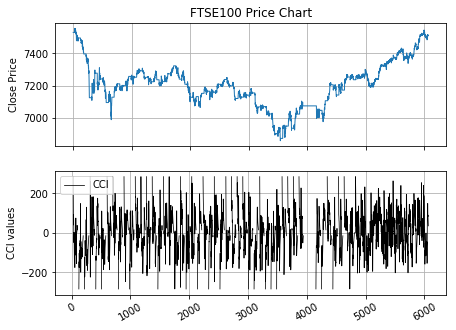

In [19]:
# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(df['Close_y'],lw=1)
plt.title('FTSE100 Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI,'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':10})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [20]:
df = pd.concat([df, CCI], axis=1)

In [21]:
df.head()

,Time_UTC,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,CCI
0,2018-02-01 00:00:00,1.41987,1.42129,1.41983,1.42113,1743.74,7529.75,7529.75,7529.75,7529.75,0.0,NaN
1,2018-02-01 00:15:00,1.42113,1.42114,1.42027,1.42044,1471.93,7529.75,7529.75,7529.75,7529.75,0.0,NaN
2,2018-02-01 00:30:00,1.42044,1.42072,1.42007,1.42050,1870.51,7529.75,7529.75,7529.75,7529.75,0.0,NaN
3,2018-02-01 00:45:00,1.42050,1.42050,1.41968,1.42043,1325.58,7529.75,7529.75,7529.75,7529.75,0.0,NaN
4,2018-02-01 01:00:00,1.42046,1.42046,1.41930,1.41958,1638.34,7529.75,7529.75,7529.75,7529.75,0.0,NaN


In [22]:
df = df.replace([np.inf, -np.inf], np.nan)

In [23]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["CCI"], how="all")

In [24]:
df.head(5)

,Time_UTC,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,CCI
28,2018-02-01 07:00:00,1.41701,1.41754,1.41646,1.41719,3381.49,7560.519,7560.519,7554.029,7554.530,0.01825,283.235277
29,2018-02-01 07:15:00,1.41719,1.41786,1.41594,1.41692,3919.31,7555.020,7557.020,7551.530,7551.779,0.04375,182.038914
30,2018-02-01 07:30:00,1.41697,1.41853,1.41694,1.41838,3897.51,7552.029,7554.030,7550.529,7553.779,0.03675,143.807261
31,2018-02-01 07:45:00,1.41838,1.41990,1.41780,1.41956,3770.21,7554.029,7554.779,7546.529,7547.029,0.04150,104.356962
32,2018-02-01 08:00:00,1.41952,1.42475,1.41952,1.42452,4798.23,7547.029,7559.530,7530.789,7531.869,0.27766,39.946215


In [25]:
df.shape

(4945, 12)

## Creating binary target

In [26]:
#Creating binary target variable
#the value is 1, if equal to or lower than 200, the value is 0.

df['CCI_Categorical'] = df['CCI'].map(lambda x: 1 if x > 100 else 0)

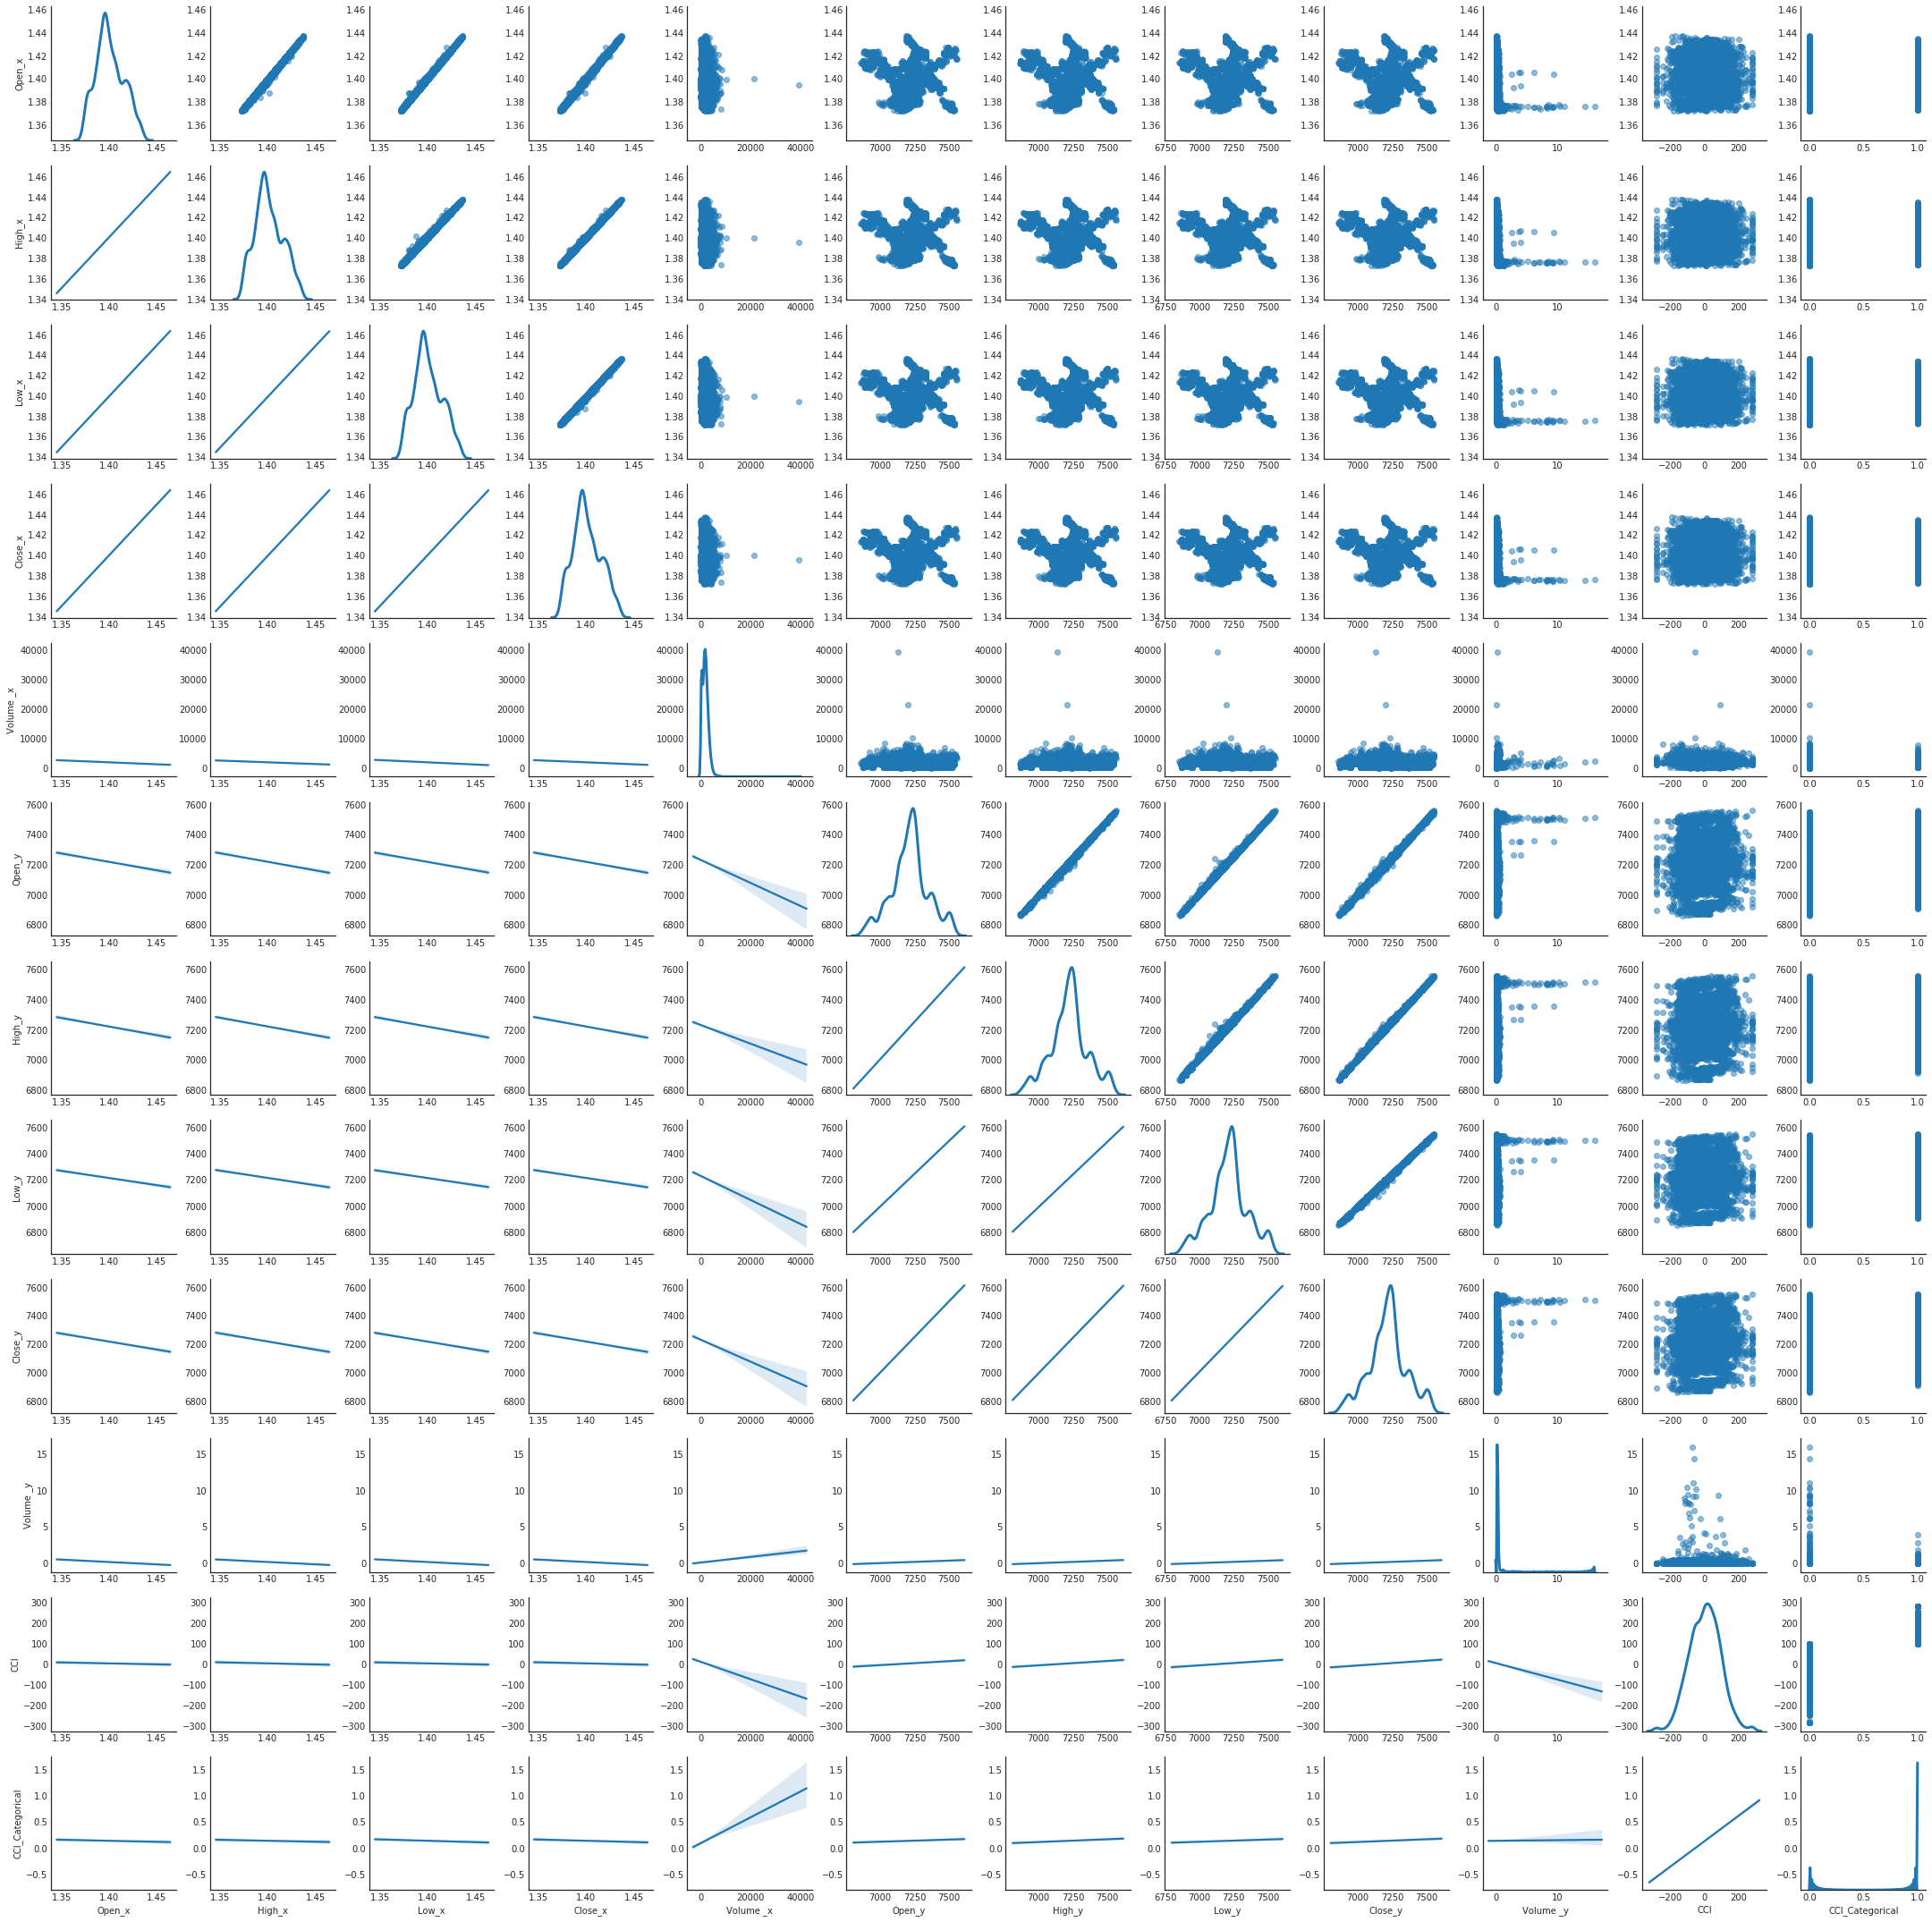

In [27]:
sns.set_style('white')

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

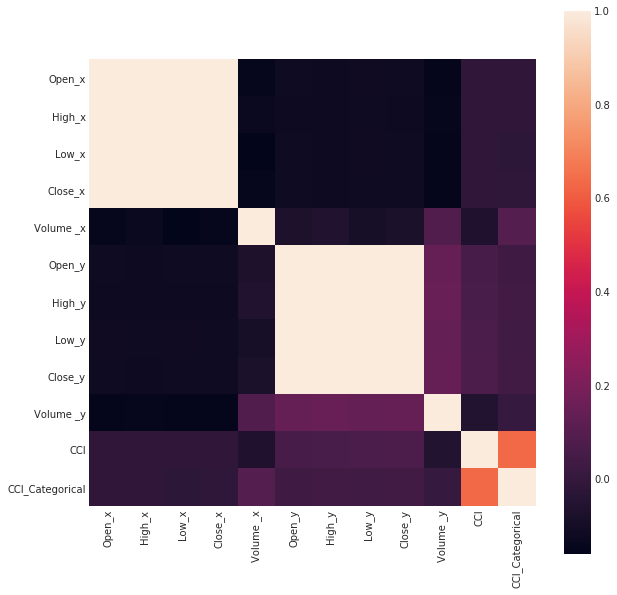

,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,CCI,CCI_Categorical
Open_x,1.000000,0.999128,0.999128,0.998461,-0.143904,-0.118590,-0.121467,-0.115872,-0.118856,-0.149275,-0.014339,-0.016355
High_x,0.999128,1.000000,0.998634,0.999234,-0.127339,-0.120935,-0.123579,-0.118562,-0.121291,-0.147183,-0.016187,-0.015198
Low_x,0.999128,0.998634,1.000000,0.999226,-0.161644,-0.118258,-0.121524,-0.115251,-0.118625,-0.151306,-0.014531,-0.021314
Close_x,0.998461,0.999234,0.999226,1.000000,-0.144672,-0.119754,-0.122757,-0.117065,-0.120176,-0.149316,-0.016105,-0.019709
Volume _x,-0.143904,-0.127339,-0.161644,-0.144672,1.000000,-0.075236,-0.061176,-0.090316,-0.075874,0.082231,-0.062106,0.095099
Open_y,-0.118590,-0.120935,-0.118258,-0.119754,-0.075236,1.000000,0.999302,0.999216,0.998886,0.146731,0.057109,0.031790
High_y,-0.121467,-0.123579,-0.121524,-0.122757,-0.061176,0.999302,1.000000,0.998564,0.999335,0.150583,0.063156,0.041458
Low_y,-0.115872,-0.118562,-0.115251,-0.117065,-0.090316,0.999216,0.998564,1.000000,0.999282,0.142009,0.066484,0.033624
Close_y,-0.118856,-0.121291,-0.118625,-0.120176,-0.075874,0.998886,0.999335,0.999282,1.000000,0.146406,0.069932,0.041005
Volume _y,-0.149275,-0.147183,-0.151306,-0.149316,0.082231,0.146731,0.150583,0.142009,0.146406,1.000000,-0.055734,0.002253


In [28]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, square=True)
plt.show()

corrmat

In [29]:
df.head()

,Time_UTC,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,CCI,CCI_Categorical
28,2018-02-01 07:00:00,1.41701,1.41754,1.41646,1.41719,3381.49,7560.519,7560.519,7554.029,7554.530,0.01825,283.235277,1
29,2018-02-01 07:15:00,1.41719,1.41786,1.41594,1.41692,3919.31,7555.020,7557.020,7551.530,7551.779,0.04375,182.038914,1
30,2018-02-01 07:30:00,1.41697,1.41853,1.41694,1.41838,3897.51,7552.029,7554.030,7550.529,7553.779,0.03675,143.807261,1
31,2018-02-01 07:45:00,1.41838,1.41990,1.41780,1.41956,3770.21,7554.029,7554.779,7546.529,7547.029,0.04150,104.356962,1
32,2018-02-01 08:00:00,1.41952,1.42475,1.41952,1.42452,4798.23,7547.029,7559.530,7530.789,7531.869,0.27766,39.946215,0


In [30]:
df.dtypes

Time_UTC           datetime64[ns]
Open_x                    float64
High_x                    float64
Low_x                     float64
Close_x                   float64
Volume _x                 float64
Open_y                    float64
High_y                    float64
Low_y                     float64
Close_y                   float64
Volume _y                 float64
CCI                       float64
CCI_Categorical             int64
dtype: object

In [31]:
#Define X and Y
X = df[['Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume _x', 'Open_y', 'High_y', 'Low_y', 'Volume _y', 'CCI']]
Y = df['CCI_Categorical']

In [32]:
# Peprocessing X's to center to the mean
X = scale(X)

# Creating train and test variables
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20)

## Modeling

### Vanilla Logistic Regression

In [33]:
# Declare and fit the model
lr = LogisticRegression(C=10)

fit = lr.fit(X_train, y_train)

In [34]:
#print accuracy rate
print('Vanilla Logistic Regression Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y = lr.predict(X_train)

print('\n Vanilla Logistic Regression Accuracy by CCI')
print(pd.crosstab(pred_y, y_train))

print('\n Vanilla Logistic Regression Percentage Accuracy')
print(lr.score(X_train, y_train))

print('\n Vanilla Logistic Regression Cross Validation Scores')
lr_cv = cross_val_score(lr, X_train, y_train, cv=5)
print(lr_cv)

print('\n Vanilla Logistic Regression Cross Validation Score Average')
print(np.mean(lr_cv))

Vanilla Logistic Regression Coefficients
[[  0.90016116   1.20505689  -0.60143647  -1.54944327  -0.10568573
   -0.7901257    1.89461138  -1.05639123   0.10294697  19.96458307]]
[-20.88282536]

 Vanilla Logistic Regression Accuracy by CCI
CCI_Categorical     0    1
row_0                     
0                3390    1
1                   1  564

 Vanilla Logistic Regression Percentage Accuracy
0.999494438827

 Vanilla Logistic Regression Cross Validation Scores
[ 1.          0.99747155  0.99620733  0.99620733  0.99873578]

 Vanilla Logistic Regression Cross Validation Score Average
0.997724399494


### Attempting with Logistic Regression Cross Validation

In [35]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(fit_intercept=True)
fit_lrcv = lrcv.fit(X_train, y_train)
print('Optimized C:', fit_lrcv.C_)
print('Coefficients: ', fit_lrcv.coef_)
print('Intercept: ', fit_lrcv.intercept_)
print('Accuracy: ', fit_lrcv.score(X_train, y_train))

Optimized C: [ 10000.]
Coefficients:  [[ -1.25047356e+01   2.47058729e+01   8.03999063e-01  -1.35457264e+01
   -1.60368715e+00  -2.84571764e+01   3.20425889e+01  -3.81505282e+00
    1.46399015e-01   2.46985590e+02]]
Intercept:  [-258.74731375]
Accuracy:  0.999747219414


#### Predicting Test set

In [36]:
#Using model to predict test set
y_pred_test = lrcv.predict(X_test)

print('\n Vanilla Logistic Regression TEST Accuracy by CCI')
print(pd.crosstab(y_pred_test, y_test))

print('\n Vanilla Logistic Regression TEST Percentage Accuracy')
print(lrcv.score(X_test, y_test))


 Vanilla Logistic Regression TEST Accuracy by CCI
CCI_Categorical    0    1
row_0                    
0                855    0
1                  0  134

 Vanilla Logistic Regression TEST Percentage Accuracy
1.0


## Ridge Regression

In [37]:
# Creating continuous target variable
y2 = df['CCI']
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y2, test_size=0.25)

# Initializing and fitting ridge regression model
ridgeregr = Ridge(alpha=0.0005, fit_intercept=False)
ridgeregr.fit(X_train2, y_train2)

# Determining accuracy of the training set
print('Ridge Regression (non-binary) Accuracy')
print(ridgeregr.score(X_train2, y_train2))
print('Ridge Regression (non-binary) Coefficients')
print(ridgeregr.coef_)

#Cross validating ridge regression
ridge_cvs = cross_val_score(ridgeregr, X_train2, y_train2)
print('Ridge Regression (non-binary) Cross Validation Scores')
print(ridge_cvs)
print('Ridge Regression (non-binary) Average Cross Validation Score')
print(ridge_cvs.mean())

Ridge Regression (non-binary) Accuracy
0.998150991289
Ridge Regression (non-binary) Coefficients
[ -1.36558688e-01   1.72767553e+00  -1.18249712e+00  -4.67355013e-01
  -7.19795376e-02  -5.47399245e-01  -6.84491042e-01   1.20036228e+00
  -1.75992991e-02   9.17054010e+01]
Ridge Regression (non-binary) Cross Validation Scores
[ 0.99812798  0.99807501  0.99820938]
Ridge Regression (non-binary) Average Cross Validation Score
0.998137456739


In [38]:
from sklearn.linear_model import RidgeCV

# Creating a list of alphas to try
alpha = np.array([1,0.1,0.01,0.001,0.0001,0.00001, 10, 100, 1000])

ridge_cv = RidgeCV(alphas=alpha, fit_intercept=False, store_cv_values=True)
fit_ridge_cv = ridge_cv.fit(X_train2, y_train2)
print('Accuracy', fit_ridge_cv.score(X_train2, y_train2))
print('Coefficients:', fit_ridge_cv.coef_)
print('Alpha: ', fit_ridge_cv.alpha_)

Accuracy 0.998150878338
Coefficients: [  1.54022920e-02   1.12788424e+00  -9.22617132e-01  -2.77761377e-01
  -6.36471397e-02  -5.45164719e-01  -4.61557113e-01   9.76505108e-01
  -1.98132782e-02   9.16811195e+01]
Alpha:  1.0


In [39]:
# Predicting accuracy based on test data
print('Accuracy')
print(fit_ridge_cv.score(X_test2, y_test2))

Accuracy
0.998147175661


### Ridge Logistic Regression¶

In [40]:
#Declare and fit the model
lr2 = LogisticRegression(C=10, penalty='l2')

fit2 = lr2.fit(X_train, y_train)

#Print accuracy rate
print('Ridge Logistic Regression Coefficients')
print(fit2.coef_)
print(fit2.intercept_)
pred_y2 = lr2.predict(X_train)

print('\n Ridge Logistic Regression Accuracy by CCI categorical')
print(pd.crosstab(pred_y2, y_train))

print('\n Ridge Logistic Regression Percentage Accuracy')
print(fit2.score(X_train, y_train))

print('\n Ridge Logistic Regression Cross Validation Scores')
lr_cv2 = cross_val_score(fit2, X_train, y_train, cv=5)
print(lr_cv2)

print('\n Ridge Logistic Regression Cross Validation Score Average')
print(np.mean(lr_cv2))

Ridge Logistic Regression Coefficients
[[  0.90016116   1.20505689  -0.60143647  -1.54944327  -0.10568573
   -0.7901257    1.89461138  -1.05639123   0.10294697  19.96458307]]
[-20.88282536]

 Ridge Logistic Regression Accuracy by CCI categorical
CCI_Categorical     0    1
row_0                     
0                3390    1
1                   1  564

 Ridge Logistic Regression Percentage Accuracy
0.999494438827

 Ridge Logistic Regression Cross Validation Scores
[ 1.          0.99747155  0.99620733  0.99620733  0.99873578]

 Ridge Logistic Regression Cross Validation Score Average
0.997724399494


In [41]:
lr2cv = LogisticRegressionCV(fit_intercept=True)
fit_lr2cv = lr2cv.fit(X_train, y_train)
print('Optimized C:', fit_lr2cv.C_)
print('Coefficients: ', fit_lr2cv.coef_)
print('Intercept: ', fit_lr2cv.intercept_)
print('Accuracy: ', fit_lr2cv.score(X_train, y_train))

Optimized C: [ 10000.]
Coefficients:  [[ -1.25047356e+01   2.47058729e+01   8.03999063e-01  -1.35457264e+01
   -1.60368715e+00  -2.84571764e+01   3.20425889e+01  -3.81505282e+00
    1.46399015e-01   2.46985590e+02]]
Intercept:  [-258.74731375]
Accuracy:  0.999747219414


In [42]:
# Using model to predict test set
y_pred_test2 = lr2cv.predict(X_test)

print('\n Ridge Logistic Regression TEST Accuracy by CCI Categorical')
print(pd.crosstab(y_pred_test2, y_test))

print('\n Ridge Logistic Regression TEST Percentage Accuracy')
print(fit_lr2cv.score(X_test, y_test))


 Ridge Logistic Regression TEST Accuracy by CCI Categorical
CCI_Categorical    0    1
row_0                    
0                855    0
1                  0  134

 Ridge Logistic Regression TEST Percentage Accuracy
1.0


### Ridge Classifier

In [43]:
from sklearn.linear_model import RidgeClassifier

rclass = RidgeClassifier(alpha=0.25, fit_intercept=False)
fit_rclass = rclass.fit(X_train, y_train)

fit_rclass.score(X_train, y_train)

#print accuracy rate
print('Ridge Classifier Coefficients')
print(fit_rclass.coef_)
print(fit_rclass.intercept_)
pred_y_rclass = fit_rclass.predict(X_train)

print('\n Ridge Classifier Accuracy by CCI Categorical')
print(pd.crosstab(pred_y_rclass, y_train))

print('\n Ridge Classifier Percentage Accuracy')
print(fit_rclass.score(X_train, y_train))

print('\n Ridge Classifier Cross Validation Scores')
rclass_cv = cross_val_score(fit_rclass, X_train, y_train, cv=5)
print(rclass_cv)

print('\n Ridge Classifier Cross Validation Score Average')
print(np.mean(rclass_cv))

Ridge Classifier Coefficients
[[  4.06908119e-01   7.31511832e-01  -9.88021164e-01  -1.43217624e-01
   -4.46269479e-04  -6.67756910e-01   2.19485055e+00  -1.52148237e+00
    9.38628845e-03   4.46401210e-01]]
0.0

 Ridge Classifier Accuracy by CCI Categorical
CCI_Categorical     0    1
row_0                     
0                2123    0
1                1268  565

 Ridge Classifier Percentage Accuracy
0.67947421638

 Ridge Classifier Cross Validation Scores
[ 0.67045455  0.69152971  0.70543616  0.65865992  0.67003793]

 Ridge Classifier Cross Validation Score Average
0.679223652454


In [44]:
#Using model to predict test set
y_pred_rclass = fit_rclass.predict(X_test)

print('\n Ridge Classifier TEST Accuracy by CCI Categorical')
print(pd.crosstab(y_pred_rclass, y_test))

print('\n Ridge Classifier TEST Percentage Accuracy')
print(fit_rclass.score(X_test, y_test))


 Ridge Classifier TEST Accuracy by CCI Categorical
CCI_Categorical    0    1
row_0                    
0                518    0
1                337  134

 Ridge Classifier TEST Percentage Accuracy
0.659251769464


### Lasso Logistic Regression

In [45]:
# Declare and fit the model
lr_l1 = LogisticRegression(C=10, penalty='l1')

fit_lasso = lr_l1.fit(X_train, y_train)

# Print accuracy rate
print('Lasso Logistic Regression Coefficients')
print(fit_lasso.coef_)
print(fit_lasso.intercept_)
pred_y_lasso = lr_l1.predict(X_train)

print('\n Lasso Logistic Regression Accuracy by CCI Categorical')
print(pd.crosstab(pred_y_lasso, y_train))

print('\n Lasso Logistic Regression Percentage Accuracy')
print(fit_lasso.score(X_train, y_train))

print('\n Lasso Logistic Regression Cross Validation Scores')
lr_lasso_cv = cross_val_score(fit_lasso, X_train, y_train, cv=5)
print(lr_lasso_cv)

print('\n Lasso Logistic Regression Cross Validation Score Average')
print(np.mean(lr_lasso_cv))

Lasso Logistic Regression Coefficients
[[  0.           0.           0.          -0.10497182  -0.19939919
   -0.1496597    0.           0.           0.24417507  87.85884465]]
[-91.85707598]

 Lasso Logistic Regression Accuracy by CCI Categorical
CCI_Categorical     0    1
row_0                     
0                3390    0
1                   1  565

 Lasso Logistic Regression Percentage Accuracy
0.999747219414

 Lasso Logistic Regression Cross Validation Scores
[ 1.          1.          0.99873578  0.99747155  1.        ]

 Lasso Logistic Regression Cross Validation Score Average
0.999241466498


In [46]:
#Using model to predict test set
y_pred_test_lasso = lr_l1.predict(X_test)

print('\n Ridge Logistic Regression TEST Accuracy by CCI Categorical')
print(pd.crosstab(y_pred_test_lasso, y_test))

print('\n Ridge Logistic Regression TEST Percentage Accuracy')
print(fit_lasso.score(X_test, y_test))


 Ridge Logistic Regression TEST Accuracy by CCI Categorical
CCI_Categorical    0    1
row_0                    
0                855    0
1                  0  134

 Ridge Logistic Regression TEST Percentage Accuracy
1.0


### Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

lass = Lasso(alpha=0.25, fit_intercept=False)
lass.fit(X_train2, y_train2)
print('Lasso Accuracy: ', lass.score(X_train2, y_train2))
print('Lasso Coefficients: ', lass.coef_)
print('Lasso Cross Validation Scores: \n', cross_val_score(lass, X_train2, y_train2))
print('Lasso Average Cross Validation Score: ', cross_val_score(lass, X_train2, y_train2).mean())

Lasso Accuracy:  0.998142491943
Lasso Coefficients:  [ -0.          -0.          -0.          -0.          -0.          -0.          -0.
  -0.          -0.          91.46488895]
Lasso Cross Validation Scores: 
 [ 0.99813227  0.99808424  0.99820585]
Lasso Average Cross Validation Score:  0.998140787006


## write-up

Applying Lasso Logistic Regression, gave the best result.